# 1 - CONFIGURAÇÕES INICIAIS

## 1.1. IMPORTS

In [57]:
import pandas                   as pd
import numpy                    as np
import seaborn                  as sns
import matplotlib.pyplot        as plt
from IPython.core.display       import HTML
from IPython.display            import Image
from matplotlib                 import ticker
from sklearn.cluster            import DBSCAN
from sklearn.cluster            import KMeans
from sklearn_extra.cluster      import KMedoids
from sklearn                    import manifold
from numpy.random               import RandomState
from sklearn.metrics            import silhouette_score
from scipy.cluster.hierarchy    import dendrogram, linkage
from sklearn.cluster            import AgglomerativeClustering
from sklearn.preprocessing      import RobustScaler, MinMaxScaler

## 1.2. GRÁFICOS E NÚMEROS

In [58]:
# Configura os gráficos
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    # configura o pandas para quantidade de casas decimeis
    pd.set_option('display.float_format', lambda x: '%.8f' % x)

    sns.set()
jupyter_settings()

## 1.3. CARREGANDO OS DADOS
## Dataset do site Kaggle: "https://www.kaggle.com/datasets/camnugent/california-housing-prices"

In [59]:
df1 = pd.read_csv('housing.csv')
df1 = df1.loc[:1000, :].copy()

# 2 - EXTRAÇÃO, CARGA E TRANSFORMAÇÃO DOS DADOS

## 2.1. Renomeando as colunas

In [60]:
col_new = [
    'long', 'lat', 'age', 'rooms', 'bedrooms', 'population', 
    'households', 'income', 'value', 'ocean_proximity'
    ]
df1.columns = col_new

## 2.2. DIMENSÕES DOS DADOS

In [61]:
print(f'Número de linhas: {df1.shape[0]}')
print(f'Número de colunas: {df1.shape[1]}')

Número de linhas: 1001
Número de colunas: 10


## 2.3. CHECANDO E TRATANDO DADOS FALTANTES

In [62]:
df1 = df1.dropna()
df1.isna().sum()

long               0
lat                0
age                0
rooms              0
bedrooms           0
population         0
households         0
income             0
value              0
ocean_proximity    0
dtype: int64

## 2.4. CHECANDO OS TIPOS DOS DADOS

In [63]:
df1.dtypes

long               float64
lat                float64
age                float64
rooms              float64
bedrooms           float64
population         float64
households         float64
income             float64
value              float64
ocean_proximity     object
dtype: object

## 2.5. ALTERANDO OS TIPOS DE DADOS

In [64]:
df1.age = df1.age.astype('int32')
df1.rooms = df1.rooms.astype('int32')
df1.bedrooms = df1.bedrooms.astype('int32')
df1.population = df1.population.astype('int32')
df1.households = df1.households.astype('int32')
df1.income = round(df1.income.astype('float32'), 2)
df1.value = round(df1.value.astype('float32'), 2)
df1.lat = df1.lat.astype('float32')
df1.long = df1.long.astype('float32')

# 3 - VERIFICANDO AS DISTRIBUIÇÕES E PREPARANDO A BASE

## 3.1. RECARREGANDO OS DADOS

In [65]:
df2 = df1.copy()
df2.head()

long         lat  age  rooms  bedrooms  population  households     income           value ocean_proximity
0 -122.23000336 37.88000107   41    880       129         322         126 8.32999992 452600.00000000        NEAR BAY
1 -122.22000122 37.86000061   21   7099      1106        2401        1138 8.30000019 358500.00000000        NEAR BAY
2 -122.23999786 37.84999847   52   1467       190         496         177 7.26000023 352100.00000000        NEAR BAY
3 -122.25000000 37.84999847   52   1274       235         558         219 5.63999987 341300.00000000        NEAR BAY
4 -122.25000000 37.84999847   52   1627       280         565         259 3.84999990 342200.00000000        NEAR BAY

## 3.2. PLOTANDO OS DADOS

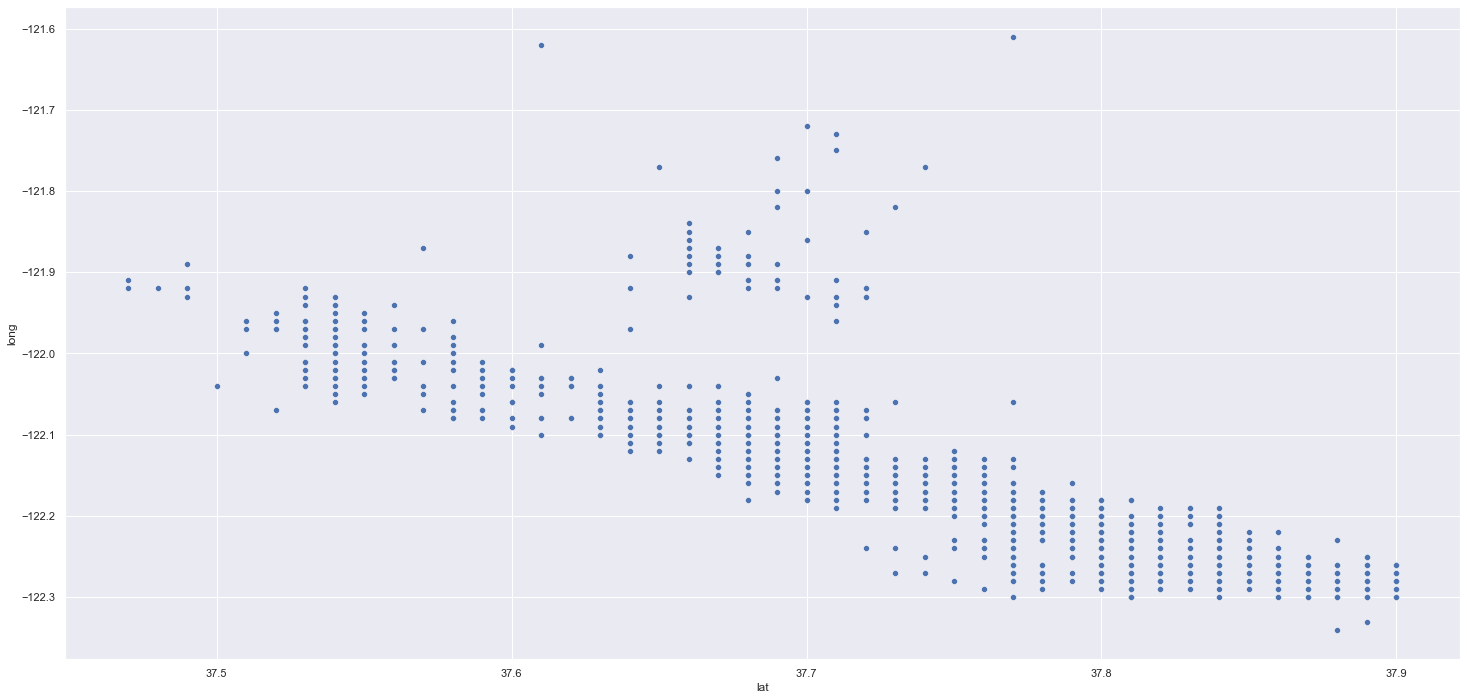

In [66]:
sns.scatterplot(x='lat', y='long', data=df2, palette='Accent');

## 3.3. ELIMINANDO REDUNDÂNCIAS

In [67]:
df2.drop(columns=['bedrooms', 'households', 'income', 'ocean_proximity'], inplace=True)

## 3.4. VERIFICANDO OS OUTLIERS


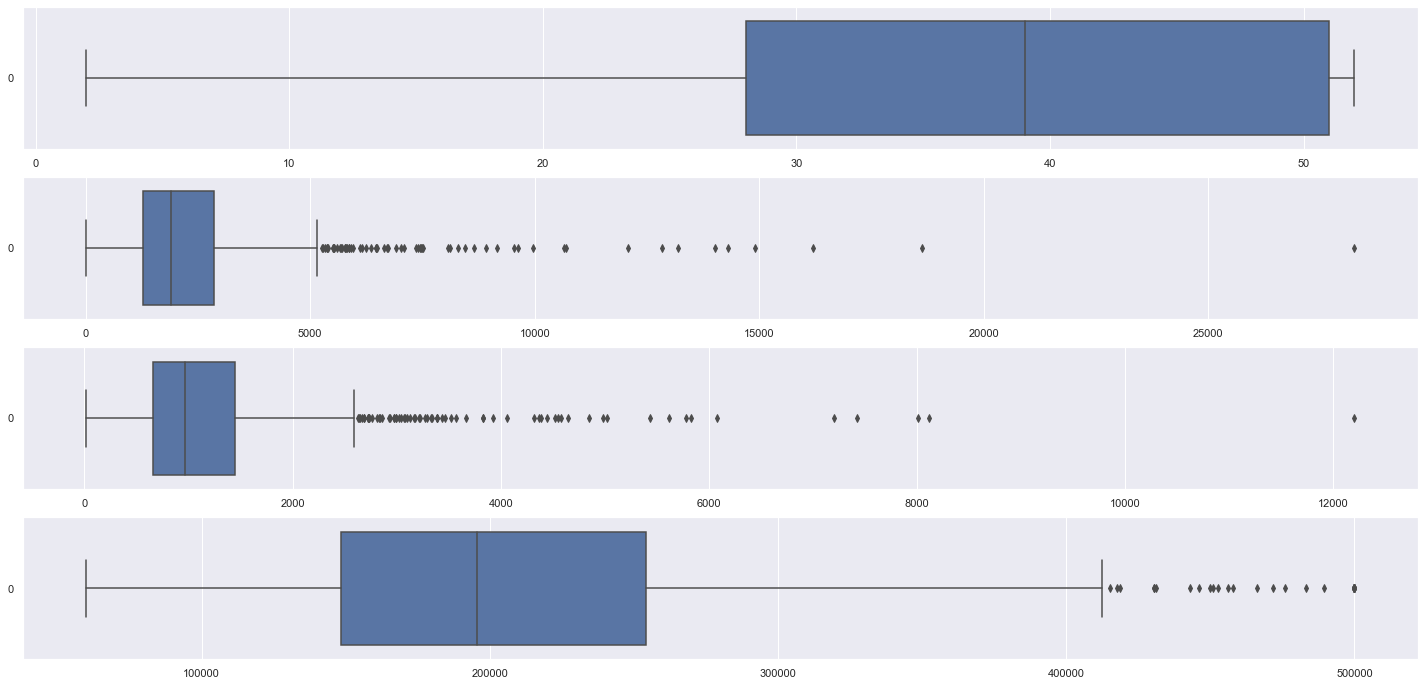

In [68]:
plt.subplot(4, 1, 1)
sns.boxplot(data=df2.age, orient="h");

plt.subplot(4, 1, 2)
sns.boxplot(data=df2.rooms, orient="h");

plt.subplot(4, 1, 3)
sns.boxplot(data=df2.population, orient="h");

plt.subplot(4, 1, 4)
sns.boxplot(data=df2.value, orient="h");

## 3.5. MUDANDO A ESCALA DAS FEATURES


In [69]:
ms = MinMaxScaler() # poucos outliers
rs = RobustScaler() # muitos outliers

df2.age = ms.fit_transform(df2[['age']].values)
df2.value = ms.fit_transform(df2[['value']].values)
df2.rooms = rs.fit_transform(df2[['rooms']].values)
df2.population = rs.fit_transform(df2[['population']].values)

# 4 - MODELANDO KMEANS

## 4.1. EXECUTANDO O MODELO

In [70]:
df_kmeans = df2.copy()

X = np.array(df_kmeans)
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)
df_kmeans['kmeans_classes'] = kmeans.labels_

## 4.2. PLOTANDO A SEPARAÇÃO


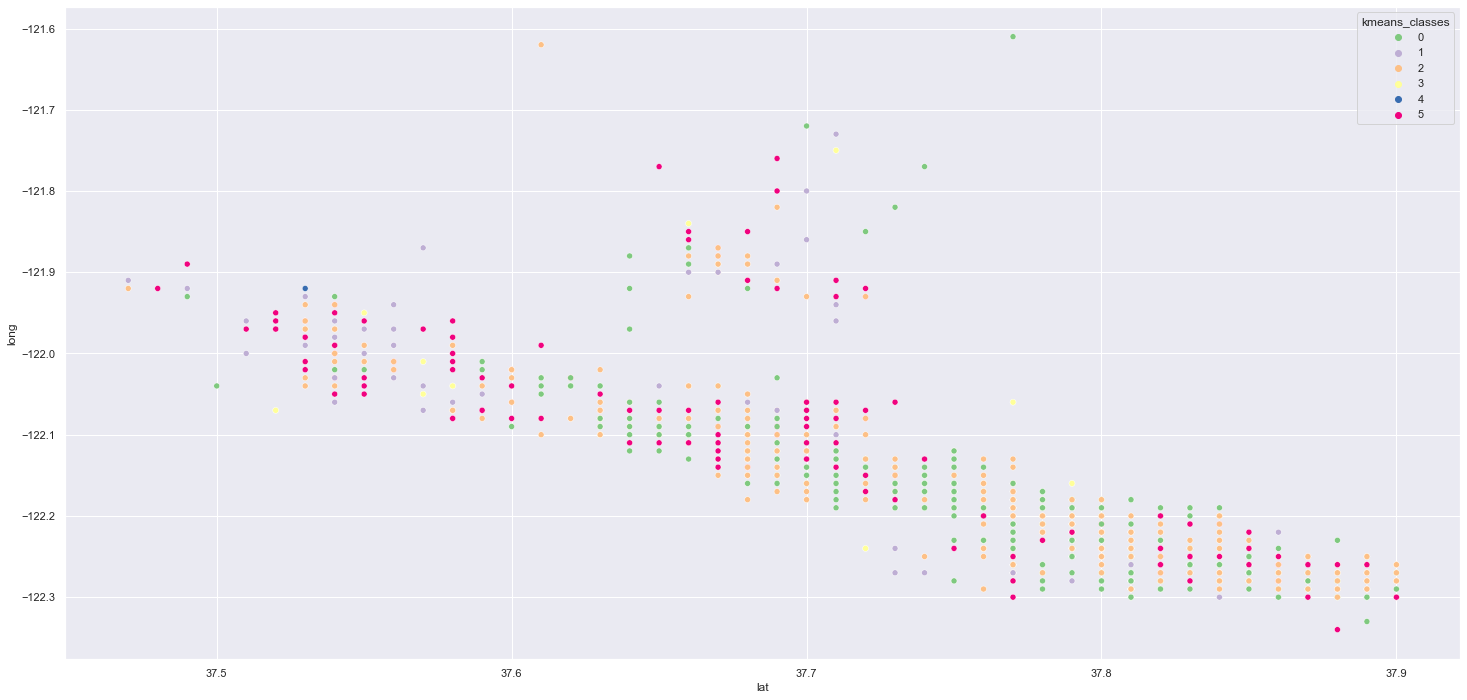

In [71]:
sns.scatterplot(x='lat', y='long', hue='kmeans_classes', data=df_kmeans, palette='Accent');

## 4.3. VERIFICANDO O RESULTADO

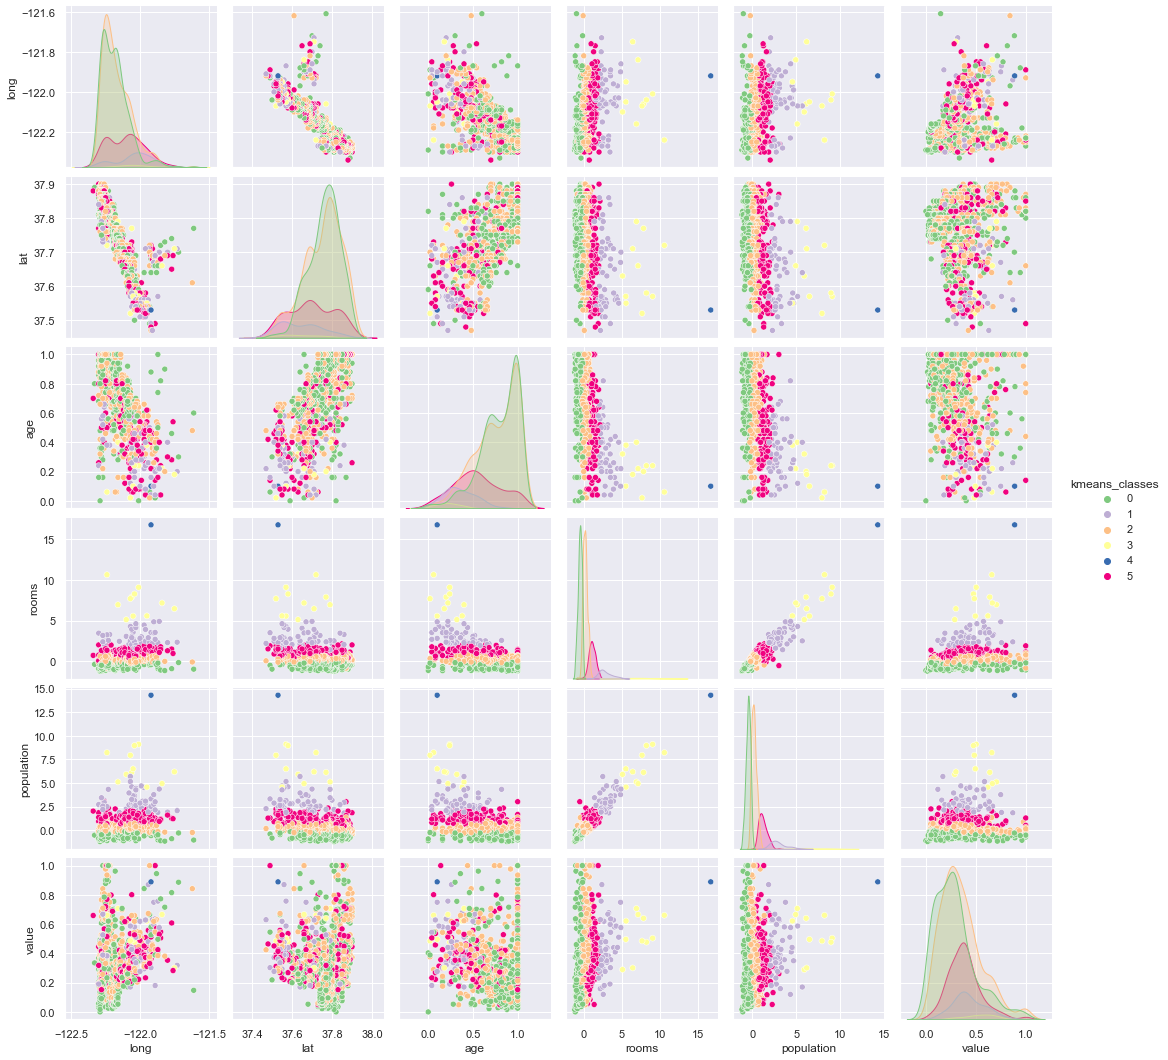

In [72]:
sns.pairplot(df_kmeans, hue='kmeans_classes', palette='Accent');

# 5 - MODELANDO ALGORITMO PAM


## 5.1. EXECUTANDO O MODELO

In [73]:
df_medoids = df2.copy()

X = np.array(df_medoids)
kmedoids = KMedoids(n_clusters=6, random_state=42)
kmedoids.fit(X)
df_medoids['pam_classes'] = kmedoids.labels_

## 5.2. PLOTANDO A SEPARAÇÃO


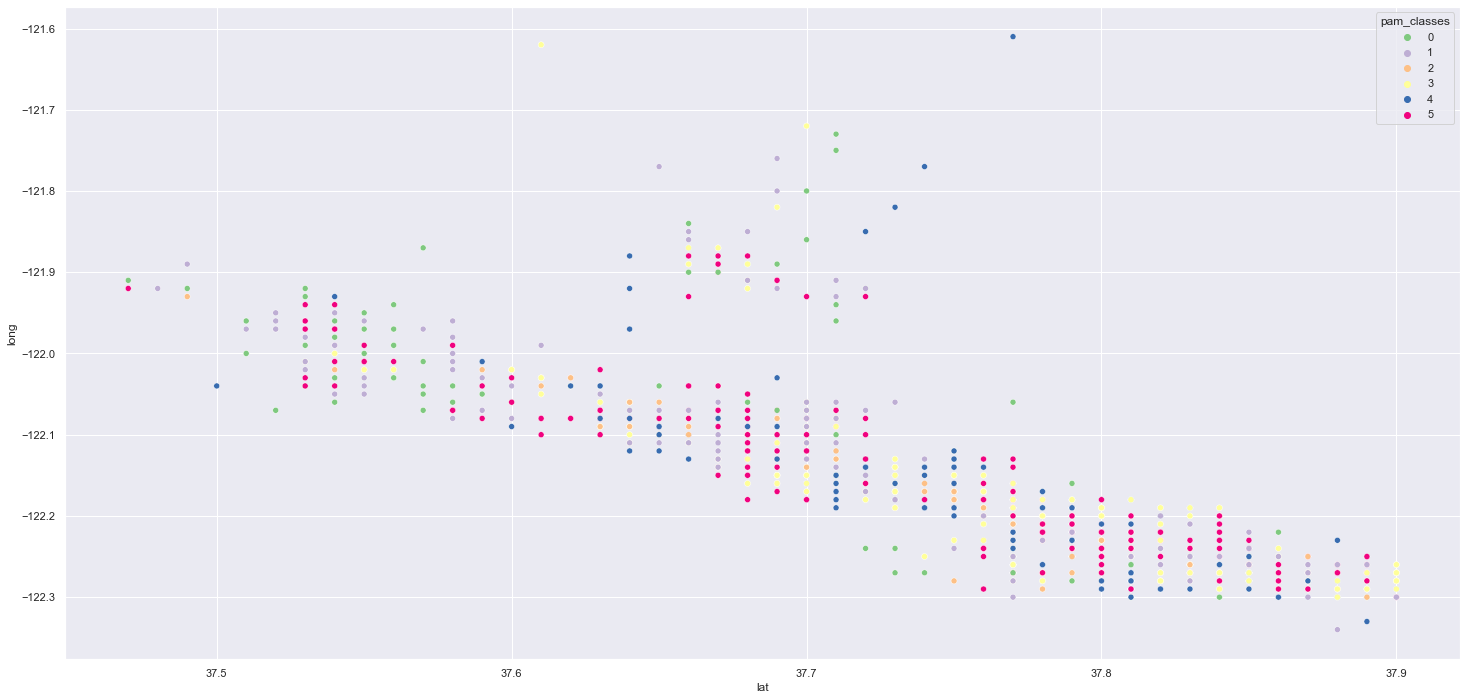

In [74]:
sns.scatterplot(x='lat', y='long', hue='pam_classes', data=df_medoids, palette='Accent');

## 5.3. VERIFICANDO O RESULTADO

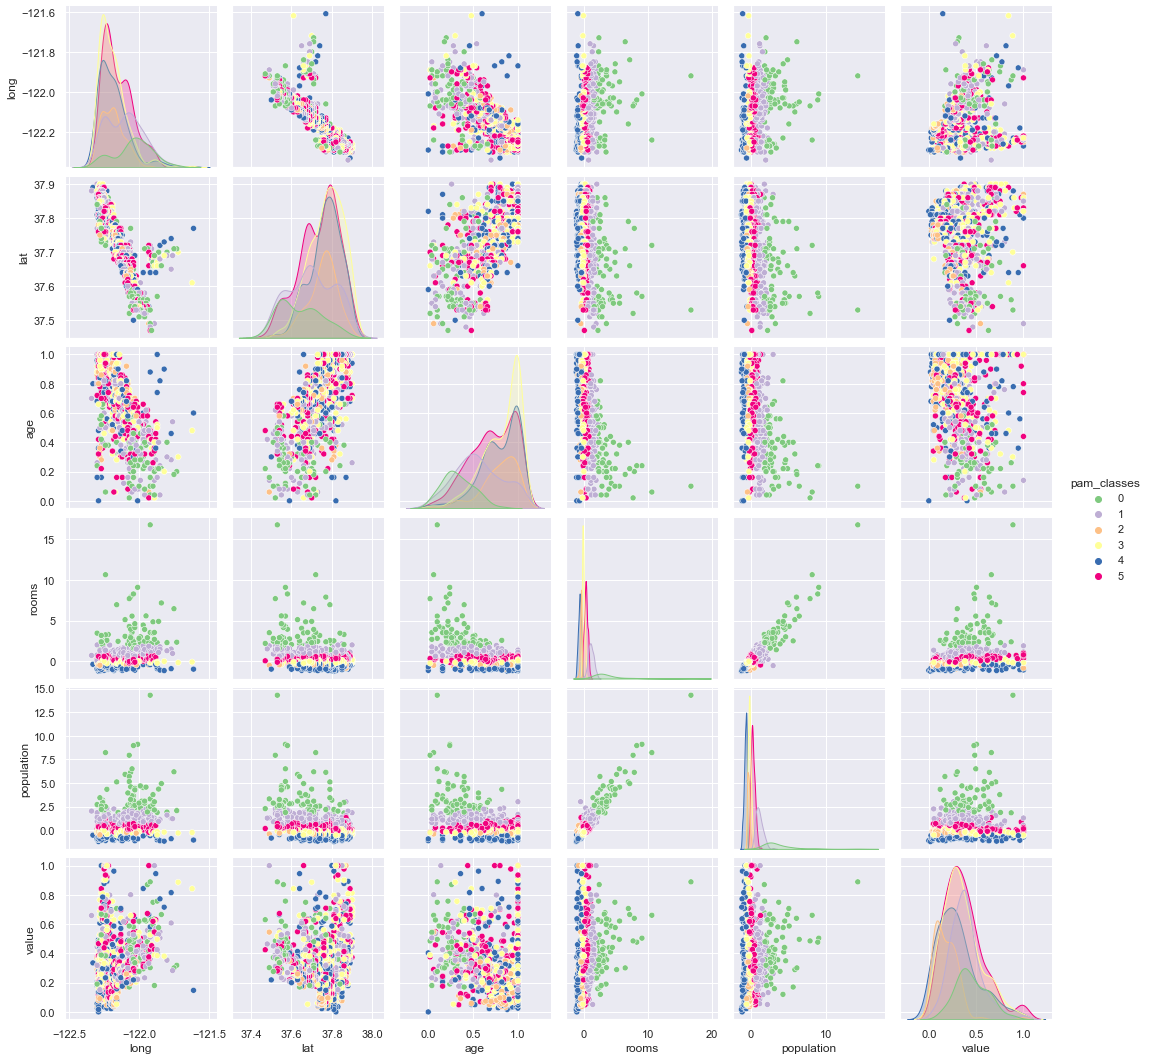

In [75]:
sns.pairplot(df_medoids, hue='pam_classes', palette='Accent');

# 7 - MODELANDO ALGORITMO DBSCAN

## 7.1. EXECUTANDO O MODELO

In [79]:
df_dbscan = df2.copy()

X = np.array(df_dbscan.drop(columns=['lat', 'long']))
dbscan = DBSCAN(eps=1, min_samples=3000)

dbscan.fit(X)
df_dbscan['dbscam_classes'] = dbscan.labels_

## 7.2. PLOTANDO A SEPARAÇÃO


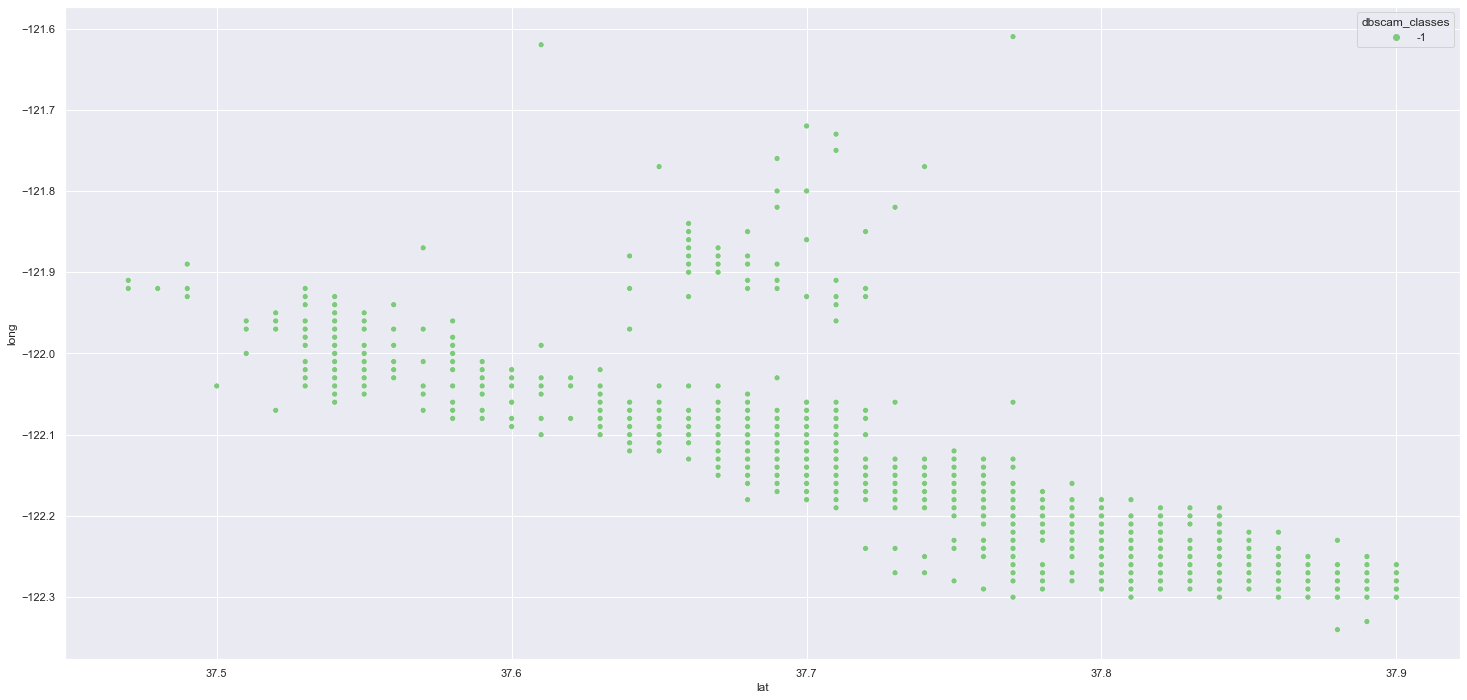

In [80]:
sns.scatterplot(x='lat', y='long', hue='dbscam_classes', data=df_dbscan, palette='Accent');

## 7.3. VERIFICANDO O RESULTADO

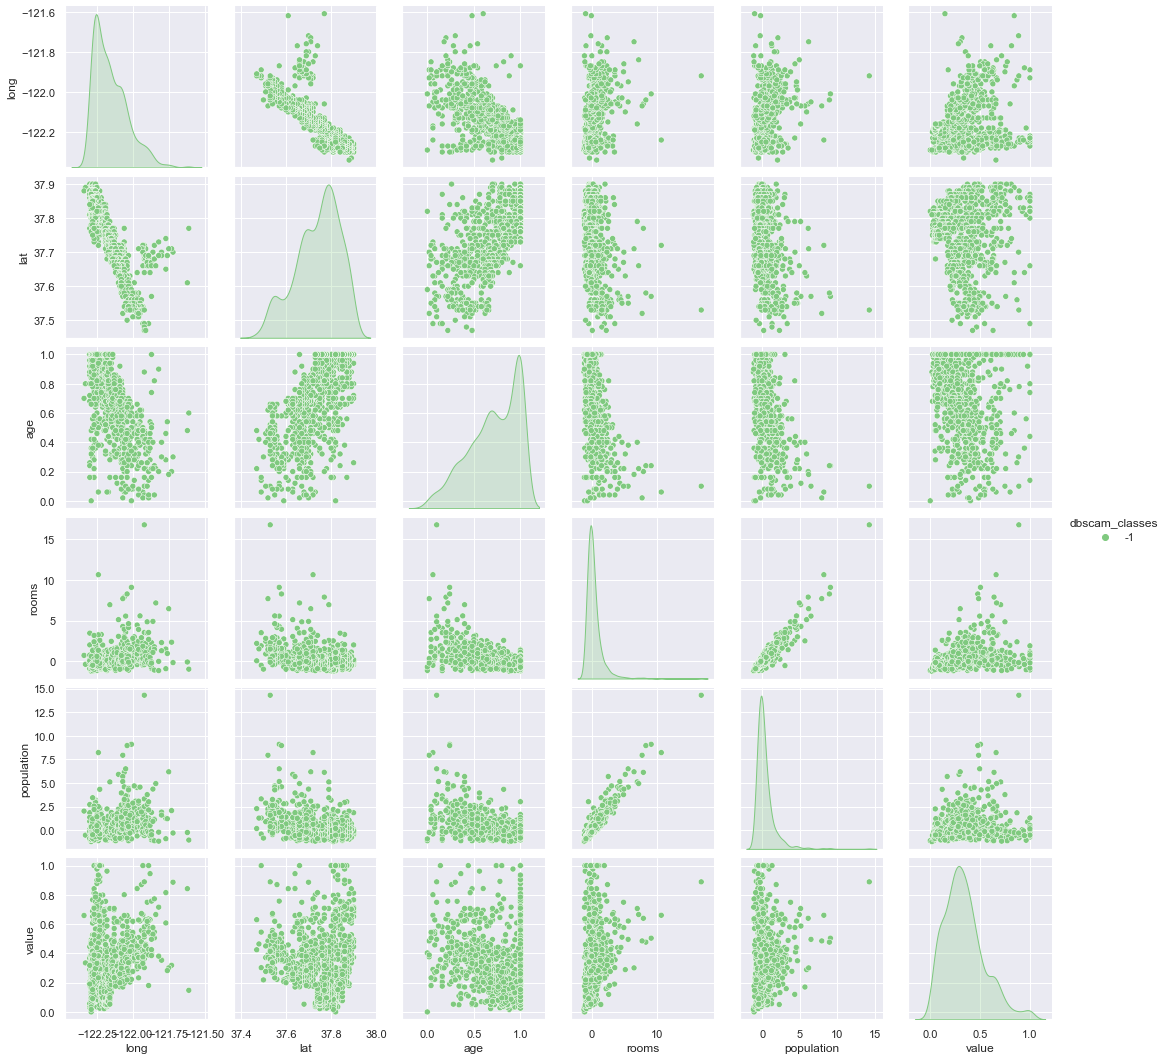

In [81]:
sns.pairplot(df_dbscan, hue='dbscam_classes', palette='Accent');

# 8 - MODELANDO ALGORITMO CLUSTERING HIERÁQUICO AGLOMERATIVO

## 8.1. EXECUTANDO O MODELO

Text(0, 0.5, 'Distância Euclidiana')

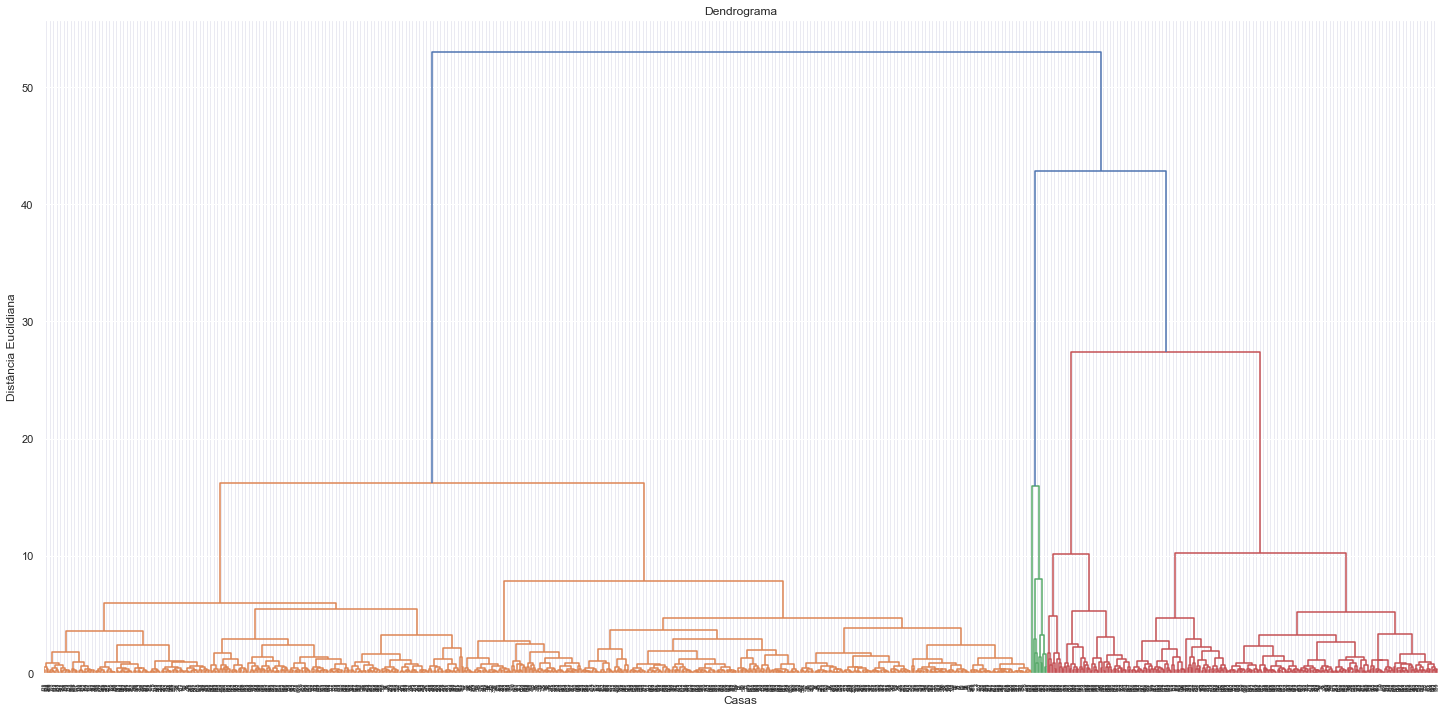

In [82]:
df_hierarquico = df2.copy()
X = np.array(df_hierarquico)

dendrograma = dendrogram(linkage(X, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Casas')
plt.ylabel('Distância Euclidiana')

## 8.1.A - MÉTODO WARD

In [83]:
h_ward = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
h_ward.fit_predict(X)
df_hierarquico['ward_classes'] = h_ward.labels_

## 8.1.B - MÉTODO COMPLETE-LINKAGE

In [84]:
h_complete = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'complete')
h_complete.fit_predict(X)
df_hierarquico['complete_classes'] = h_complete.labels_

## 8.2. PLOTANDO A SEPARAÇÃO (MÉTODO WARD x MÉTODO COMPLETE-LINKAGE)


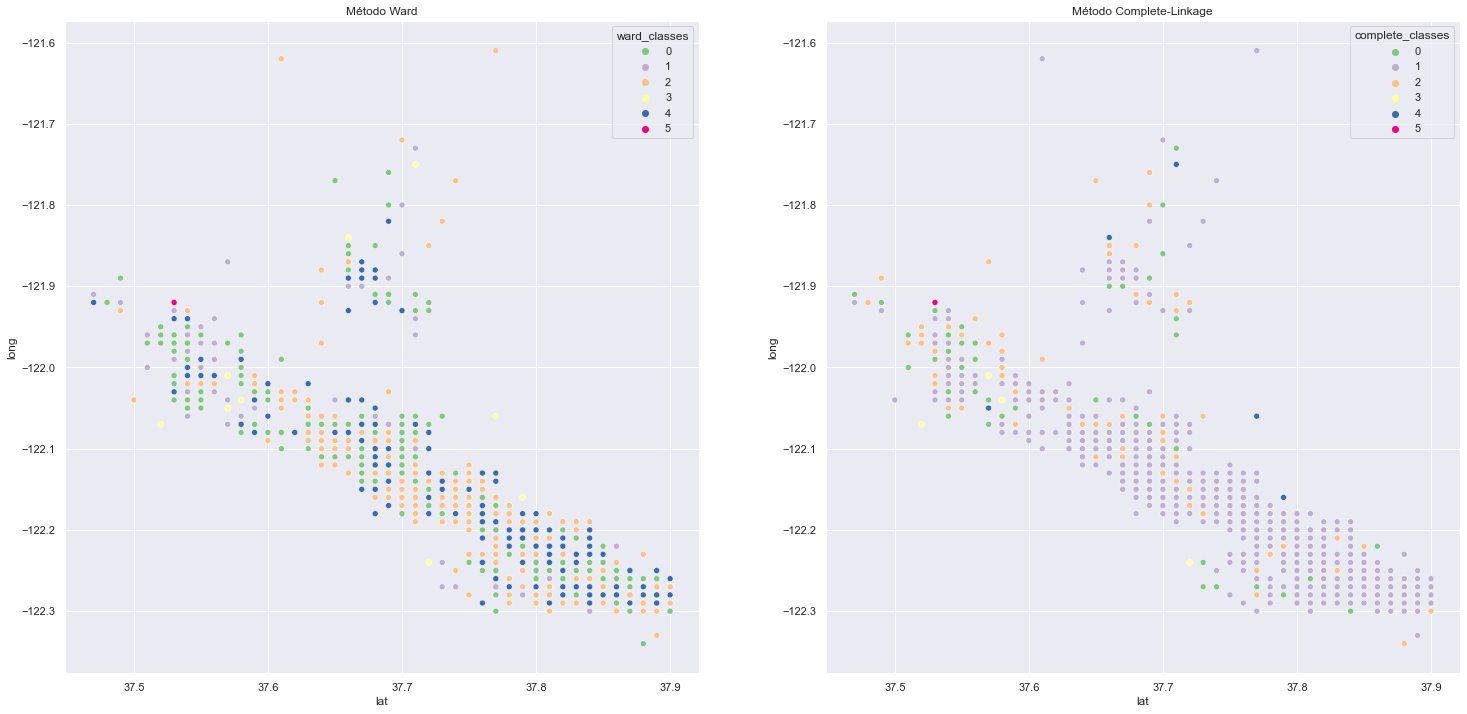

In [85]:
plt.subplot(1, 2, 1)
plt.title('Método Ward')
sns.scatterplot(x='lat', y='long', hue='ward_classes', data=df_hierarquico, palette='Accent');

plt.subplot(1, 2, 2)
plt.title('Método Complete-Linkage')
sns.scatterplot(x='lat', y='long', hue='complete_classes', data=df_hierarquico, palette='Accent');

## 8.3. VERIFICANDO O RESULTADO

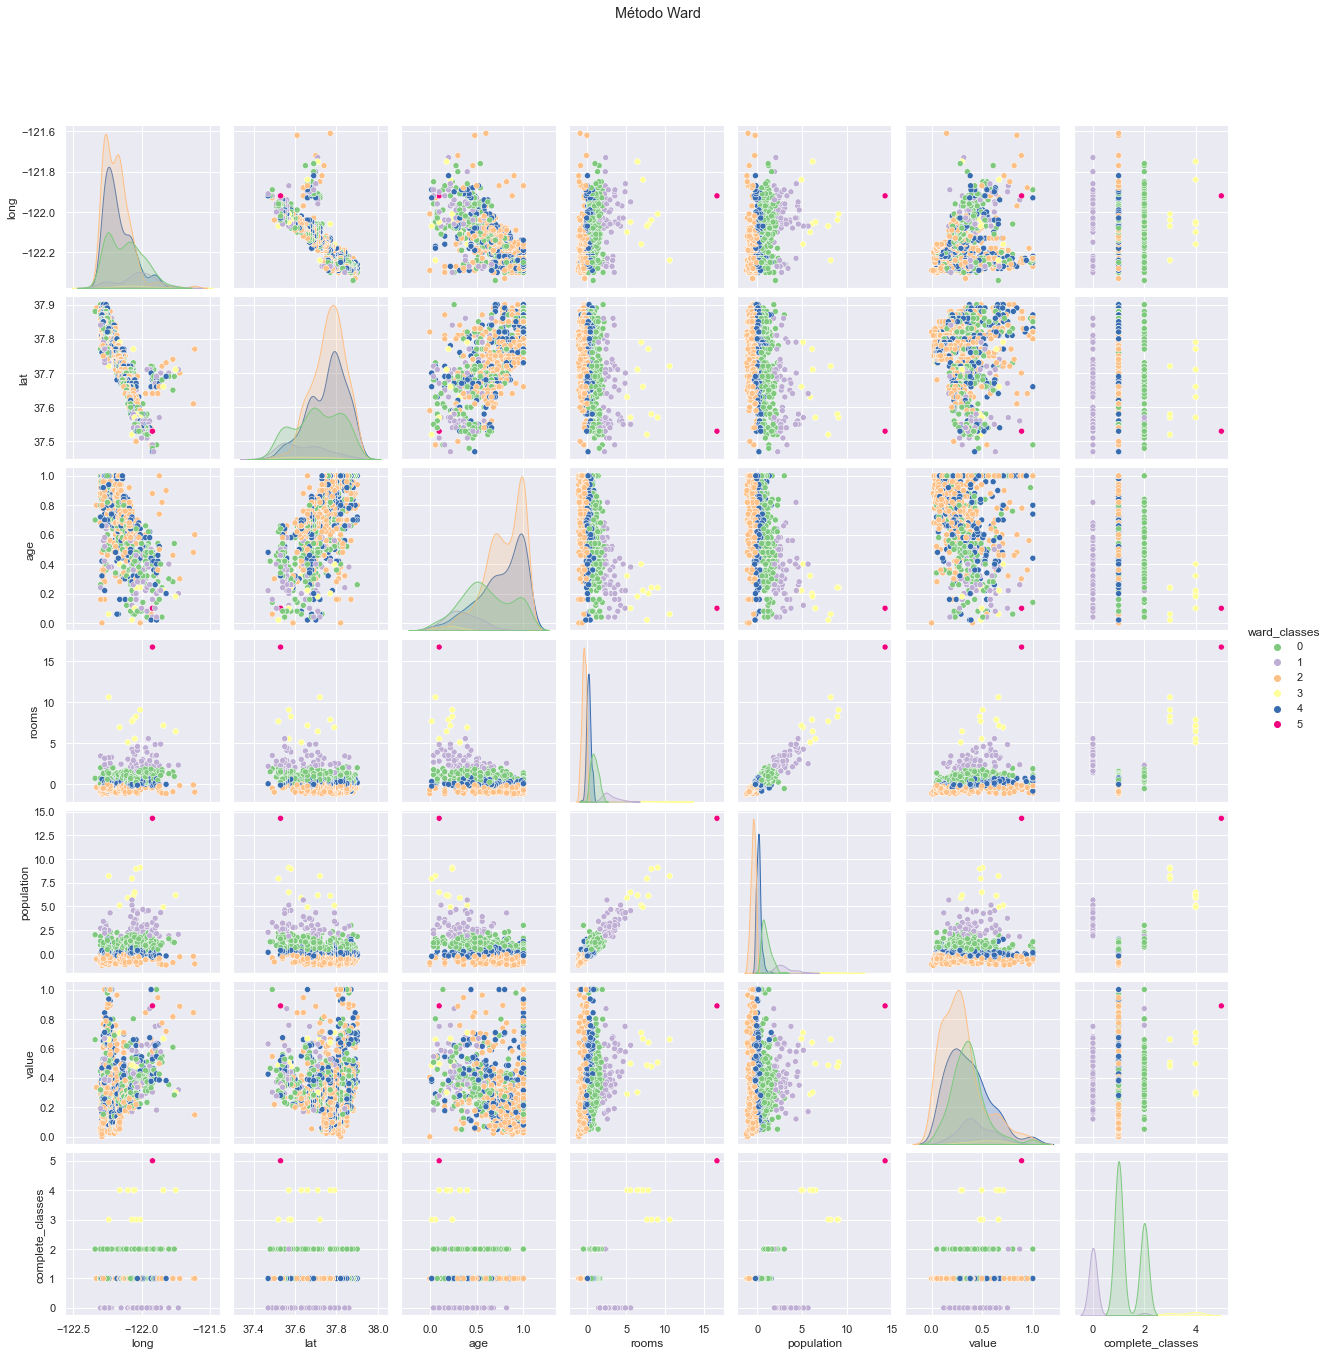

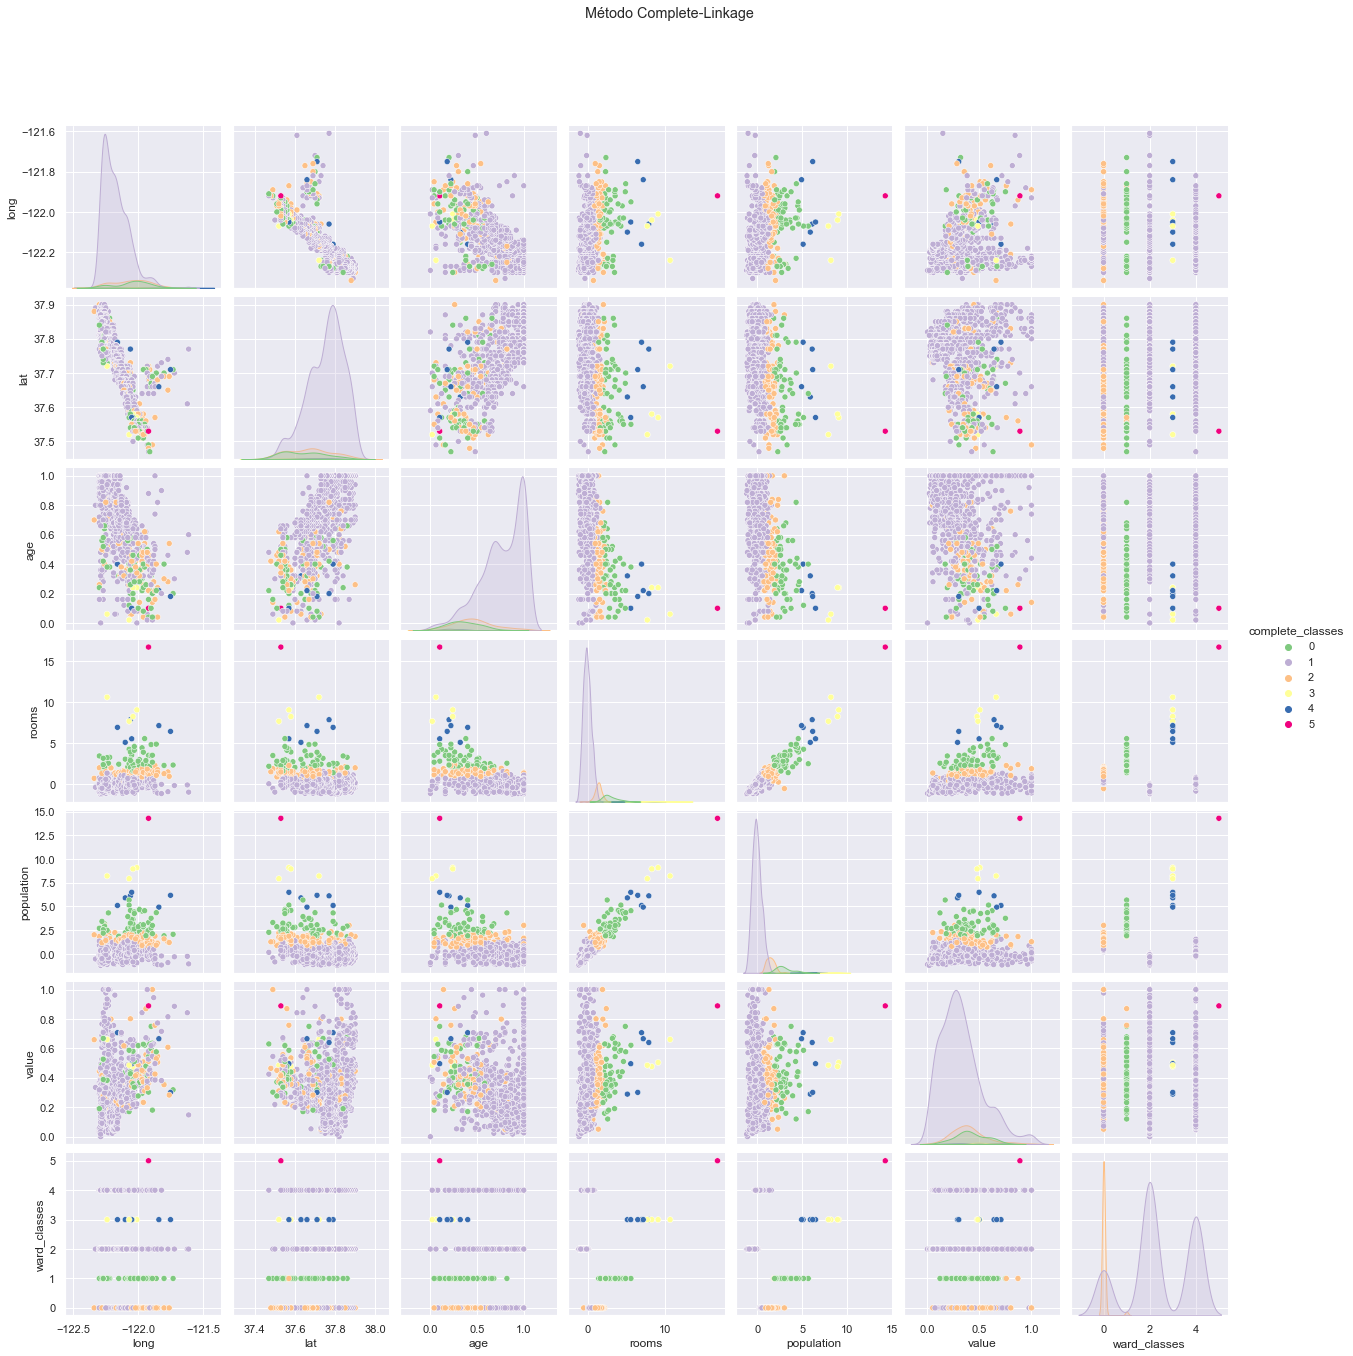

In [86]:
# plt.title('Método Complete-Linkage')
g = sns.pairplot(df_hierarquico, hue='ward_classes', palette='Accent');
g.fig.suptitle("Método Ward", y=1.08);

# plt.title('Método Ward')
h = sns.pairplot(df_hierarquico, hue='complete_classes', palette='Accent');
h.fig.suptitle("Método Complete-Linkage", y=1.08);

# 9 - MÉTRICAS

## 9.1. SILHUETA

In [87]:

silhouette_avg = silhouette_score(X, df_hierarquico['complete_classes'])
print("the average silhouette_score is :", silhouette_avg,)

the average silhouette_score is : 0.48323238859922796


## 9.2. DUNN


In [88]:
from sklearn.metrics import pairwise_distances
from validclust import dunn

dist = pairwise_distances(X)
dunn(dist, df_hierarquico['complete_classes'])

0.0426031806674293

# 10 - REDUÇÃO DE DIMENSIONALIDADE

In [89]:
rng = RandomState(0)
n_samples = 1500
S_points = df2[['lat', 'long', 'value']].loc[:1000,].values
S_points = df2[['lat', 'long', 'value']].values
S_color = S_points[:,1]

# Configurando os plots
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(25, 12),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show();

def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(25, 12), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show();

def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

n_neighbors = 12
n_components = 2 

## 10.1. MDS

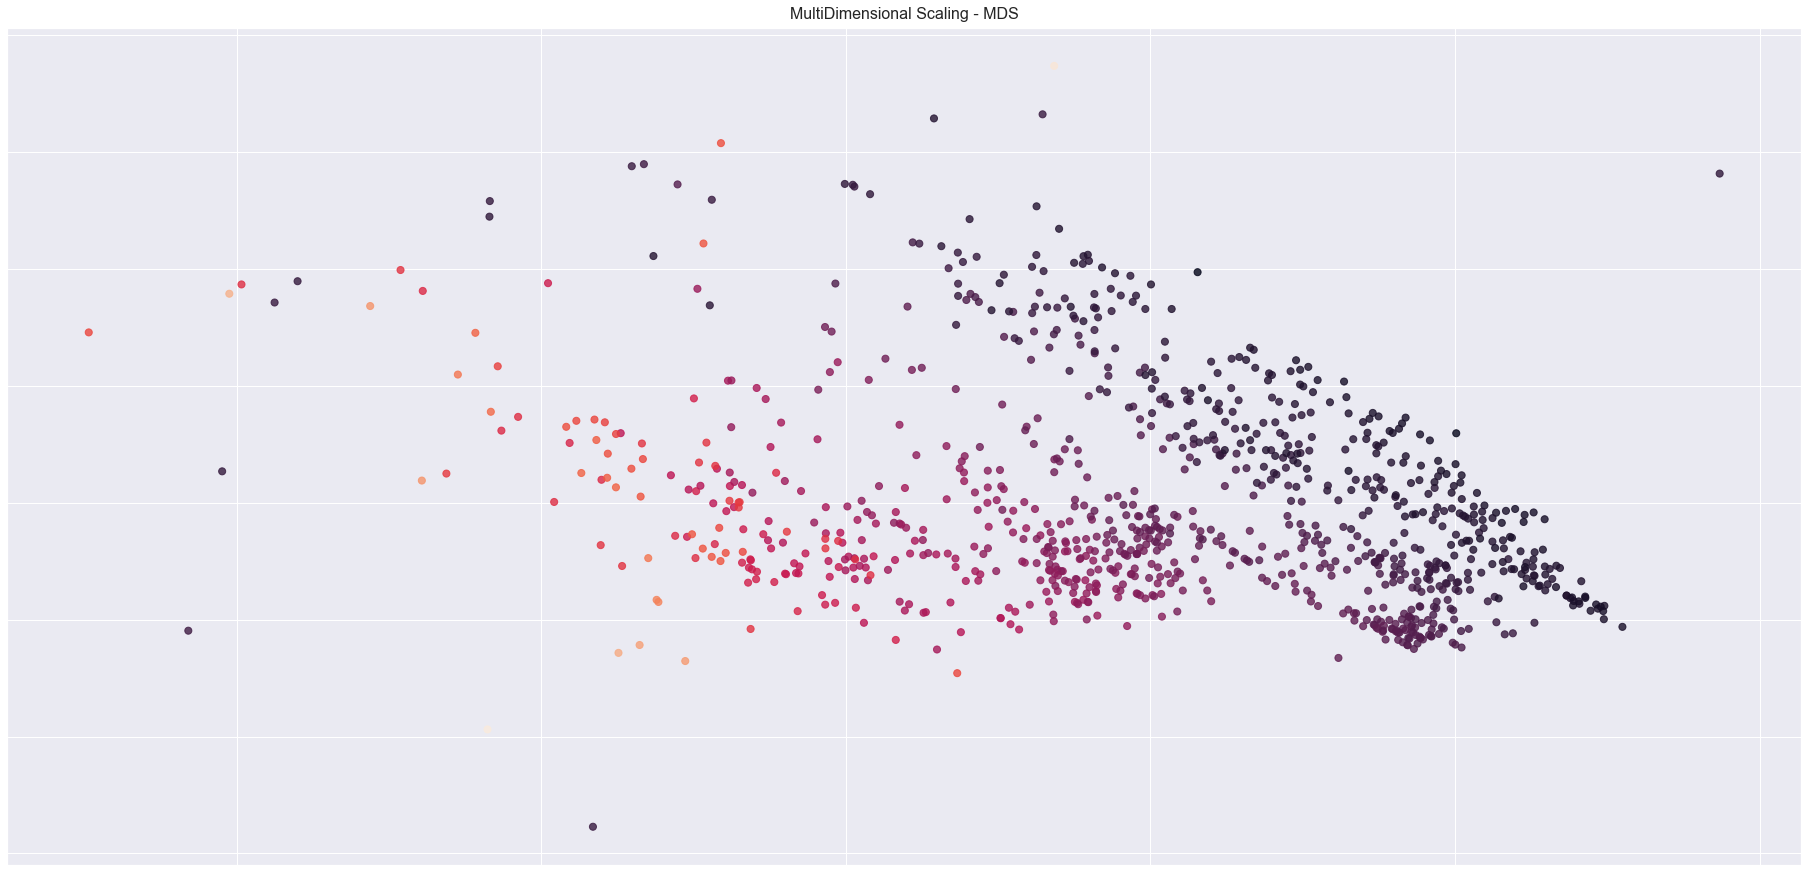

In [90]:
md_scaling = manifold.MDS(
    n_components=n_components, max_iter=50, n_init=4, random_state=rng
)
S_scaling = md_scaling.fit_transform(S_points)

plot_2d(S_scaling, S_color, "MultiDimensional Scaling - MDS")

## 10.2. T-SNE

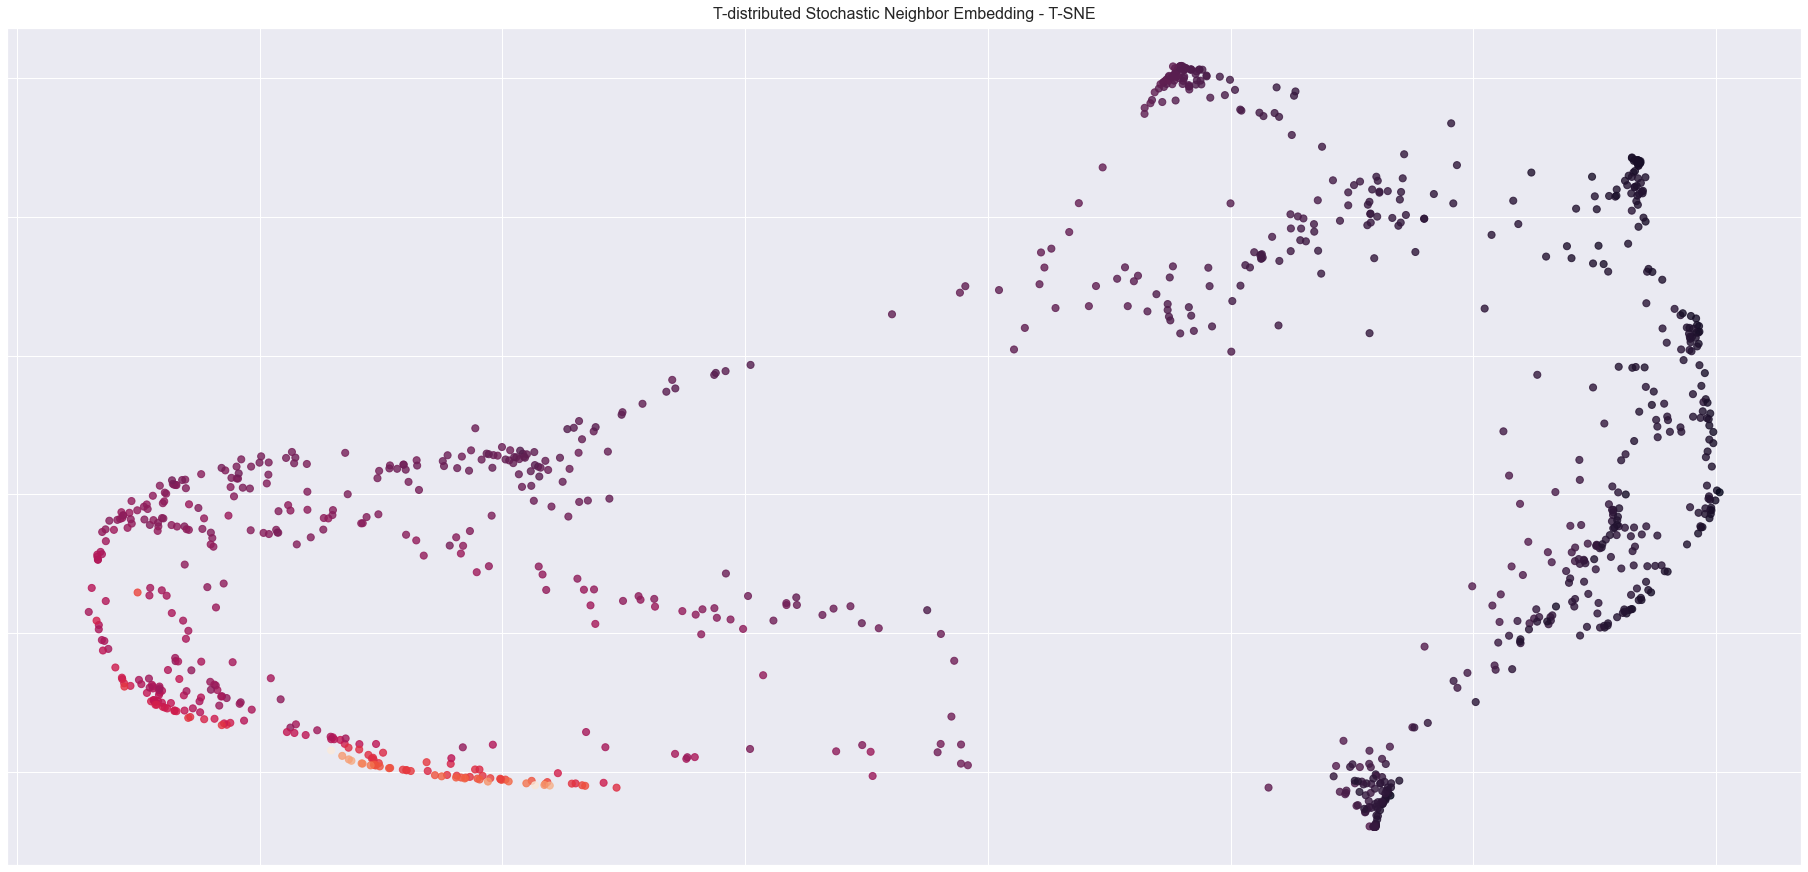

In [91]:
t_sne = manifold.TSNE(
    n_components=n_components,
    learning_rate="auto",
    perplexity=30,
    n_iter=250,
    init="random",
    random_state=rng,
)
S_t_sne = t_sne.fit_transform(S_points)

plot_2d(S_t_sne, S_color, "T-distributed Stochastic Neighbor Embedding - T-SNE")

## 10.3. SAMMON MAPPING

In [92]:
# função para calcular constante c, baseada na matriz das distâncias:
def C(distances):
    c = 0
    for i in range(distances.shape[0]):
        for j in range(distances.shape[0]):
            if (i < j):
                c += distances[i, j]

    return c

# Função para calcular a tensão Sammon com base nas matrizes de distância para a dimensão superior e inferior
def sammonStress(in_distances, out_distances, c):
    E = 0
    for i in range(in_distances.shape[0]):
        for j in range(in_distances.shape[0]):
            if (i < j):
                E += ((out_distances[i, j] - in_distances[i, j]) ** 2) / in_distances[i, j]
    return E / c

# Função Sammon Mapping:
def sammon(X, iter=500, epsilon=1e-7, alpha=0.3):
    rows = X.shape[0]

    #random two-dimensional layout of points
    y = np.random.normal(0.0, 1.0, [rows, 2])

    in_distances = metrics.pairwise_distances(X)
    c = C(in_distances)
  
    stress_old = np.inf
  
    for epoch in range(1, iter+1):
        out_distances = metrics.pairwise_distances(y)    
        stress = sammonStress(in_distances, out_distances, c)
        if (stress_old - stress < epsilon):
            break

        stress_old = stress
        partial_der1 = np.array([0,0])
        partial_der2 = np.array([0,0])

        for i in range(rows):
            for j in range(rows):
                if (i != j):
                    denominator = out_distances[i, j] * in_distances[i, j]
                    difference = out_distances[i, j] - in_distances[i, j]
                    y_difference = np.subtract(y[i], y[j])

                    if (denominator < 0.000001):
                        denominator = 0.000001

                    partial_der1 = partial_der1 + np.multiply(difference / denominator, y_difference)
                    partial_der2 = partial_der2 + (1 / denominator) * (difference - np.divide(np.square(y_difference), in_distances[i, j]) * (1 + difference / in_distances[i, j]))

            partial_der1 = (-2 / c) * partial_der1
            partial_der2 = (-2 / c) * partial_der2

            y[i] = y[i] + alpha * (partial_der1 / np.abs(partial_der2))

    return y

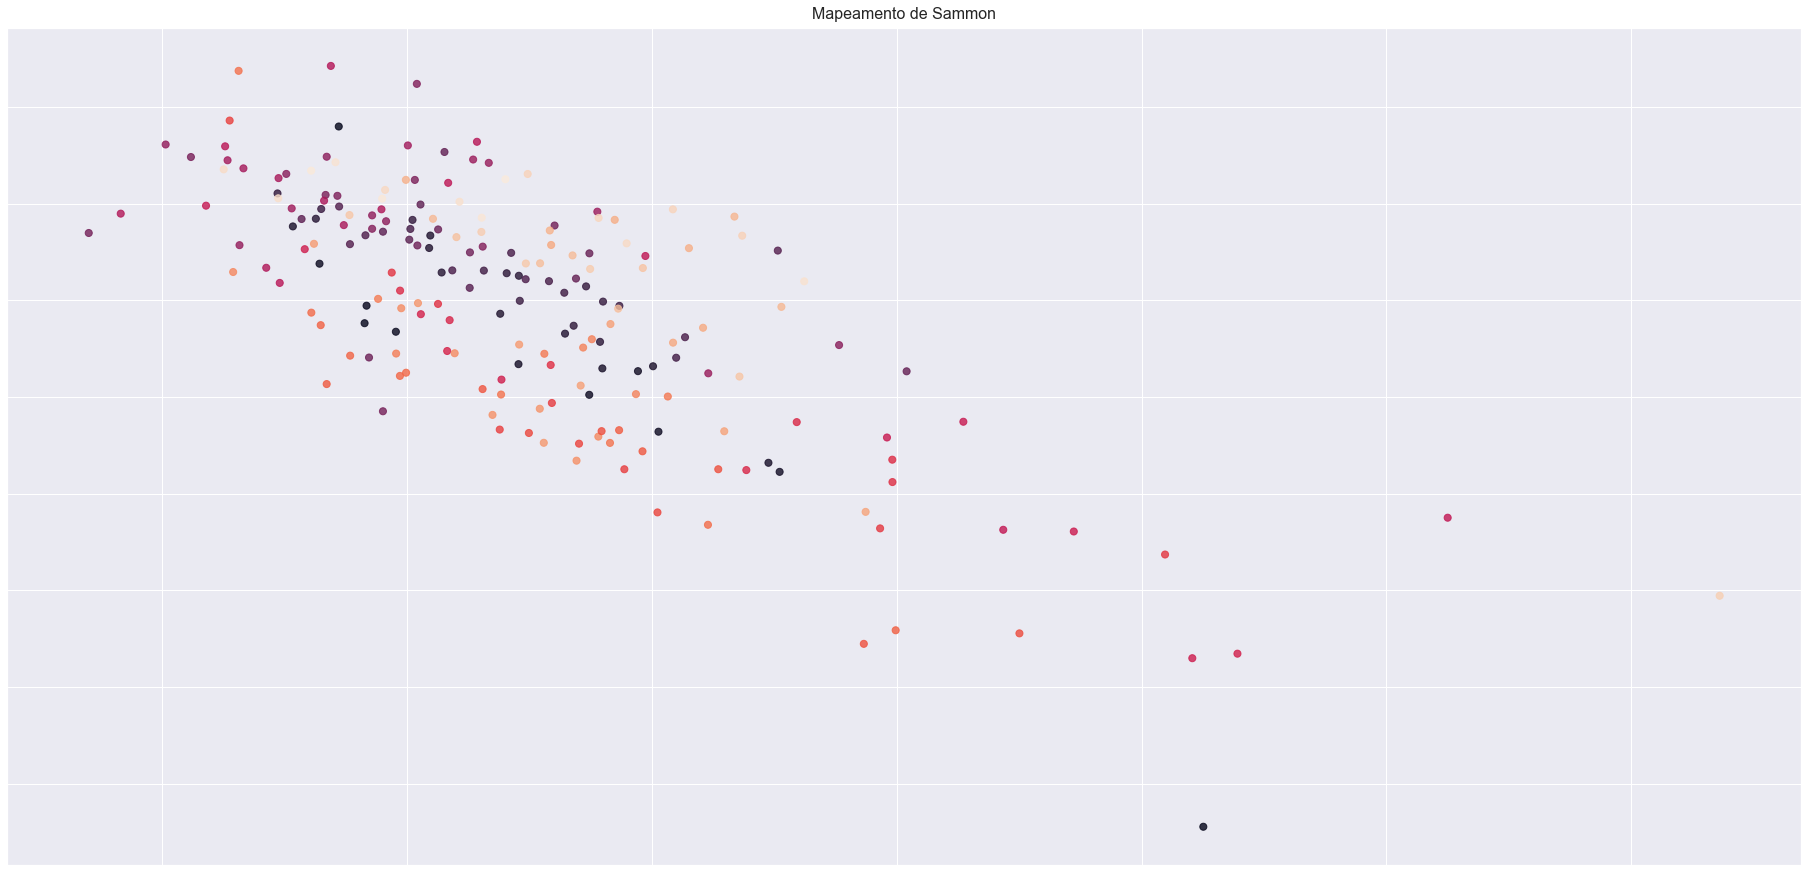

In [115]:
# Descomentar a linha de baixo vai fazer o algoritmo rodar bem mais rápido
# df2 = df2.loc[:200,].copy()
df_sammon = df2.values # com a linha de cima comentada a função roda com todos os dados
(X,index) = np.unique(df_sammon.data, axis=0, return_index=True)
y = sammon(X, alpha=1)
plot_2d(y, index, "Mapeamento de Sammon")